In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
import warnings
warnings.filterwarnings('ignore')

Training data and test data, saved in train.csv and test.csv files

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
train_data.head(2)

,user_id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1374,58,No,Travel_Rarely,605,Sales,21,3,Life Sciences,1,1938,4,Female,72,3,4,Manager,4,Married,17875,11761,4,Y,Yes,13,3,3,80,1,29,2,2,1,0,0,0
1,1092,45,No,Travel_Rarely,950,Research & Development,28,3,Technical Degree,1,1546,4,Male,97,3,1,Research Scientist,4,Married,2132,4585,4,Y,No,20,4,4,80,1,8,3,3,5,4,0,3


The distribution of the turnover rate

In [3]:
train_data['Attrition'].value_counts()

No     988
Yes    188
Name: Attrition, dtype: int64

Since No Yes is not recognized by the model, we convert the data to 0 and 1 and use the lambda function to mutate the data

In [4]:
train_data['Attrition']=train_data['Attrition'].apply(lambda x:0 if x=='No' else 1)

In [5]:
data=train_data.append(test_data)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 293
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   user_id                   1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1176 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EmployeeNumber            1470 non-null   int64  
 11  EnvironmentSatisfaction   1470 non-null   int64  
 12  Gender                    1470 non-null   object 
 13  HourlyRate                1470 non-null   int64  
 14  JobInvolv

In [6]:
cat_list=[]
for i in train_data.columns:
    if train_data[i].dtype=='O':
        cat_list.append(i)
for n,i in enumerate(cat_list):
    cat_num=train_data[i].value_counts().index.shape[0]
    print('{0}.{1}The number of types of features is:{2}'.format(n+1,i,cat_num))

1.BusinessTravelThe number of types of features is:3
2.DepartmentThe number of types of features is:3
3.EducationFieldThe number of types of features is:6
4.GenderThe number of types of features is:2
5.JobRoleThe number of types of features is:9
6.MaritalStatusThe number of types of features is:3
7.Over18The number of types of features is:1
8.OverTimeThe number of types of features is:2


You can see that there is only one variable in the `over18` column, which means that this column is meaningless

At the same time, it is found through observation that `StandardHours` also has only one value, all of which are 80.

And `EmployeeNumber` is meaningless for judging whether to leave, so we delete these columns

In [7]:
train_data.drop(columns=['EmployeeNumber','StandardHours','Over18'],inplace=True)
test_data.drop(columns=['EmployeeNumber','StandardHours','Over18'],inplace=True)
data.drop(columns=['EmployeeNumber','StandardHours','Over18'],inplace=True)

data visualization

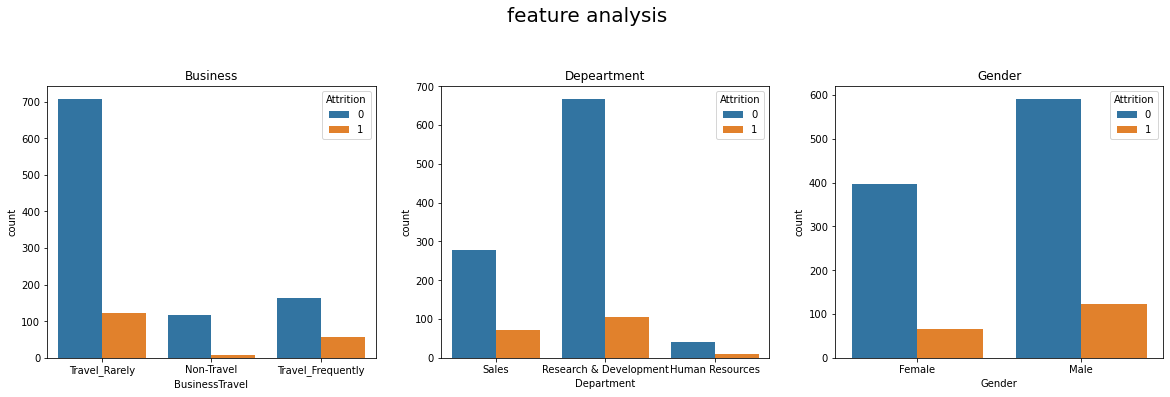

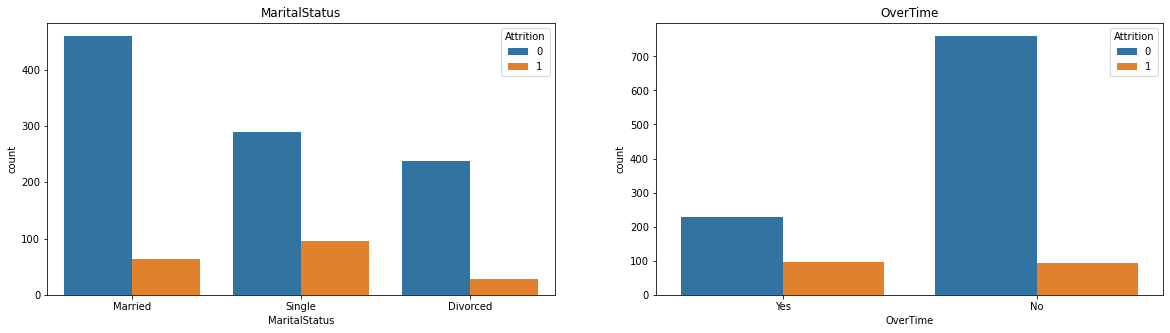

In [8]:
f,[ax1,ax2,ax3]=plt.subplots(1,3,figsize=(20,5))
sns.countplot(x='BusinessTravel',hue='Attrition',data=train_data,ax=ax1)
sns.countplot(x='Department',hue='Attrition',data=train_data,ax=ax2)
sns.countplot(x='Gender',hue='Attrition',data=train_data,ax=ax3)
ax1.set_title('Business')
ax2.set_title('Depeartment')
ax3.set_title('Gender')
f.suptitle('feature analysis',size=20,y=1.1)
f,[ax1,ax2]=plt.subplots(1,2,figsize=(20,5))
sns.countplot(x='MaritalStatus',hue='Attrition',data=train_data,ax=ax1)
sns.countplot(x='OverTime',hue='Attrition',data=train_data,ax=ax2)
ax1.set_title('MaritalStatus')
ax2.set_title('OverTime')

plt.show()

It can be seen that the turnover rate of frequent business trips is the highest; the research department has the largest proportion of the number of people, but the sales department has higher turnover, that is, the turnover rate is higher; the turnover rate of males and singles is relatively high

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Manager'),
  Text(1, 0, 'Research Scientist'),
  Text(2, 0, 'Sales Executive'),
  Text(3, 0, 'Sales Representative'),
  Text(4, 0, 'Laboratory Technician'),
  Text(5, 0, 'Manufacturing Director'),
  Text(6, 0, 'Human Resources'),
  Text(7, 0, 'Research Director'),
  Text(8, 0, 'Healthcare Representative')])

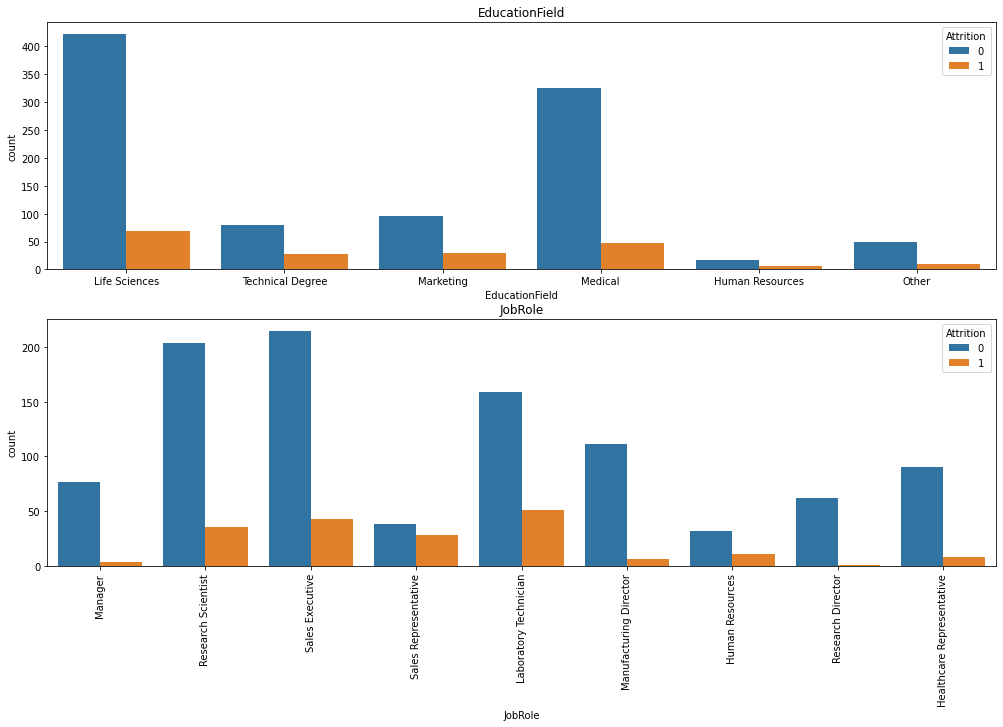

In [9]:
f,[ax1,ax2]=plt.subplots(2,1,figsize=(17,10))
sns.countplot(x='EducationField',hue='Attrition',data=train_data,ax=ax1)
sns.countplot(x='JobRole',hue='Attrition',data=train_data,ax=ax2)
ax1.set_title(u'EducationField')
ax2.set_title(u'JobRole')
plt.xticks(rotation=90)

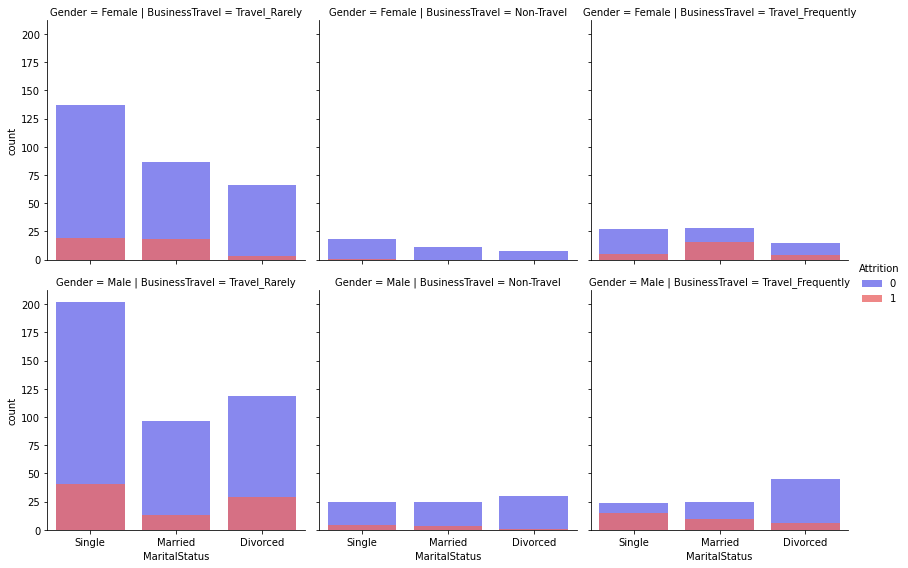

In [10]:
grid=sns.FacetGrid(train_data,row='Gender',col='BusinessTravel',hue='Attrition',palette='seismic',size=4)
grid.map(sns.countplot,'MaritalStatus',alpha=0.8)
grid.add_legend()

By combining the three factors of marriage, business travel, and gender, it was found that single women who travel frequently have high turnover rates

The distribution of turnover by salary commission

<AxesSubplot:xlabel='PercentSalaryHike', ylabel='Attrition'>

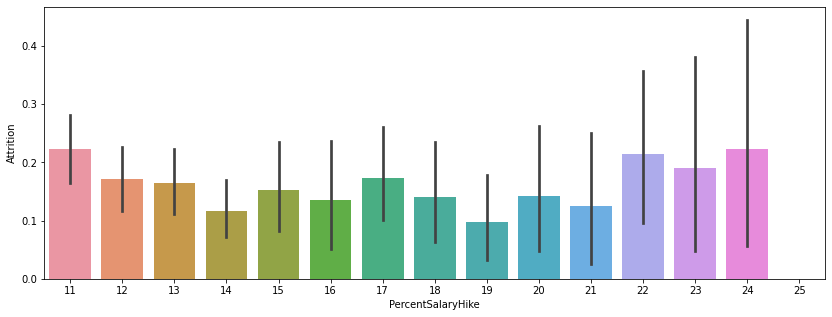

In [11]:
plt.figure(figsize=(14,5))
sns.barplot(x='PercentSalaryHike',y='Attrition',data=train_data)

In [ ]:
The distribution of turnover by age

<AxesSubplot:xlabel='Age', ylabel='Attrition'>

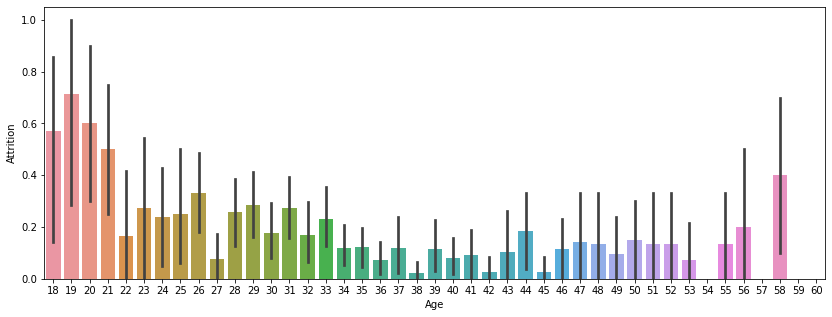

In [12]:
plt.figure(figsize=(14,5))
sns.barplot(x='Age',y='Attrition',data=train_data)

From the graph, we can see that employees between the ages of 18 and 21 will have a greater increase in their intention to leave.

one-hot encoding

In [13]:
cata_result = pd.DataFrame()
for i in data.columns:
    if data[i].dtype == 'O':
        cata = pd.DataFrame()
        cata = pd.get_dummies(data[i],prefix=i)
        cata_result = pd.concat([cata_result,cata],axis=1)

for i in data.columns:
    if data[i].dtype == 'O':
        data = data.drop(i,axis=1)

data = pd.concat([data,cata_result],axis=1)
data.head()

,user_id,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,1374,58,0.0,605,21,3,1,4,72,3,4,4,17875,11761,4,13,3,3,1,29,2,2,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
1,1092,45,0.0,950,28,3,1,4,97,3,1,4,2132,4585,4,20,4,4,1,8,3,3,5,4,0,3,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0
2,768,40,0.0,300,26,3,1,3,74,3,2,1,8396,22217,1,14,3,2,1,8,3,2,7,7,7,5,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0
3,569,36,0.0,1434,8,4,1,1,76,2,3,1,7587,14229,1,15,3,2,0,10,1,3,10,7,0,9,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0
4,911,25,1.0,599,24,1,1,3,73,1,1,4,1118,8040,1,14,3,4,0,1,4,3,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1


In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression

num=train_data.shape[0]
train_val_y=train_data.iloc[:num]['Attrition']
train_val_x=data.iloc[:num].drop(columns=['Attrition'])
test_x=data.iloc[num:].drop('Attrition',axis=1)

train_x,val_x,train_y,val_y=train_test_split(train_val_y,train_val_x,test_size=0.25,
                                            random_state=2020)

model={}
model['AdaBoost']=AdaBoostClassifier()
model['DecisionTree']=DecisionTreeClassifier()
model['KNeighbors']=KNeighborsClassifier()
model['svm']=svm.SVC()
model['LogisticRegression']=LogisticRegression()
for i in model:
    model[i].fit(train_val_x,train_val_y)
    score=cross_val_score(model[i],train_val_x,train_val_y,cv=5,scoring='roc_auc')
    print('%s auc：%.3f'%(i,score.mean()))

AdaBoost auc：0.807
DecisionTree auc：0.615
KNeighbors auc：0.595
svm auc：0.564
LogisticRegression auc：0.693


Obviously Adaboost has the highest prediction accuracy